In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [4]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [13]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [16]:
x_train.shape

(105, 4)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [18]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

Metal device set to: Apple M1


2023-05-11 04:56:58.936582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-11 04:56:58.937420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100


2023-05-11 04:59:30.836037: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-11 04:59:31.051446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 - 0s - loss: 1.1700 - accuracy: 0.3810 - 404ms/epoch - 101ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1580 - accuracy: 0.3714 - 41ms/epoch - 10ms/step
Epoch 3/100
4/4 - 0s - loss: 1.1554 - accuracy: 0.3429 - 42ms/epoch - 10ms/step
Epoch 4/100
4/4 - 0s - loss: 1.0570 - accuracy: 0.4762 - 35ms/epoch - 9ms/step
Epoch 5/100
4/4 - 0s - loss: 1.0030 - accuracy: 0.5333 - 37ms/epoch - 9ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9586 - accuracy: 0.5238 - 38ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9080 - accuracy: 0.5714 - 39ms/epoch - 10ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8406 - accuracy: 0.6190 - 38ms/epoch - 9ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8503 - accuracy: 0.6571 - 38ms/epoch - 10ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8130 - accuracy: 0.6571 - 38ms/epoch - 10ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7529 - accuracy: 0.7333 - 39ms/epoch - 10ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7364 - accuracy: 0.7238 - 36ms/epoch - 9ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6500 - accuracy: 0.7

In [23]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 18ms/step
[[9.9946219e-01 4.8392054e-04 5.3865653e-05]
 [3.4496377e-03 9.3944883e-01 5.7101529e-02]
 [9.9754477e-01 2.3062190e-03 1.4900243e-04]
 [4.0955580e-05 1.3634584e-02 9.8632449e-01]
 [9.9670237e-01 3.0157326e-03 2.8197953e-04]]


2023-05-11 05:00:12.708082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [24]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [25]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


/var/folders/75/fyf8yn3s0h3chmlrq431v9kr0000gn/T/ipykernel_24405/4125655240.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [27]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

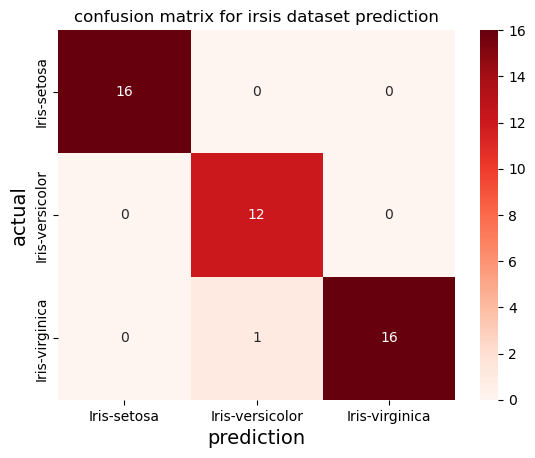

In [31]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)
